In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.formula.api as smf
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [2]:
df = pd.read_csv('minipro.csv')
df=df.drop([0,61])
df.head()

,period,balance,exports,imports,democrat,republican,gdp(billiansdollars),gdppercapita
1,1961.0,"4,194","26,403","22,208",61.10%,38.50%,563.3,3066.5629
2,1962.0,"3,371","27,722","24,352",61.10%,38.50%,605.1,3243.8431
3,1963.0,"4,210","29,620","25,411",61.10%,38.50%,638.6,3374.5152
4,1964.0,"6,022","33,340","27,319",61.10%,38.50%,685.8,3573.9412
5,1965.0,"4,664","35,285","30,621",42.70%,43.40%,743.7,3827.5271


In [6]:
df.dtypes

period                  float64
balance                  object
exports                  object
imports                  object
democrat                 object
republican               object
gdp(billiansdollars)    float64
gdppercapita            float64
dtype: object

In [7]:
df['balance']=df['balance'].str.replace(',','')
df['exports']=df['exports'].str.replace(',','')
df['imports']=df['imports'].str.replace(',','')
df['democrat']=df['democrat'].str.replace('%','')
df['republican']=df['republican'].str.replace('%','')

In [8]:
df['balance']=pd.to_numeric(df['balance'], errors='coerce')
df['exports']=pd.to_numeric(df['exports'], errors='coerce')
df['imports']=pd.to_numeric(df['imports'], errors='coerce')
df['democrat']=pd.to_numeric(df['democrat'])
df['republican']=pd.to_numeric(df['republican'])

In [9]:
df.dtypes

period                  float64
balance                   int64
exports                   int64
imports                   int64
democrat                float64
republican              float64
gdp(billiansdollars)    float64
gdppercapita            float64
dtype: object

In [10]:
df

,period,balance,exports,imports,democrat,republican,gdp(billiansdollars),gdppercapita
1,1961.0,4194,26403,22208,61.1,38.5,563.300000,3066.5629
2,1962.0,3371,27722,24352,61.1,38.5,605.100000,3243.8431
3,1963.0,4210,29620,25411,61.1,38.5,638.600000,3374.5152
4,1964.0,6022,33340,27319,61.1,38.5,685.800000,3573.9412
5,1965.0,4664,35285,30621,42.7,43.4,743.700000,3827.5271
6,1966.0,2939,38926,35987,42.7,43.4,815.000000,4146.3166
7,1967.0,2604,41333,38729,42.7,43.4,861.700000,4336.4266
8,1968.0,250,45544,45292,42.7,43.4,942.500000,4695.9234
9,1969.0,90,49220,49130,37.5,60.7,1019.900000,5032.1447
10,1970.0,2255,56640,54385,37.5,60.7,1073.303000,5234.2967


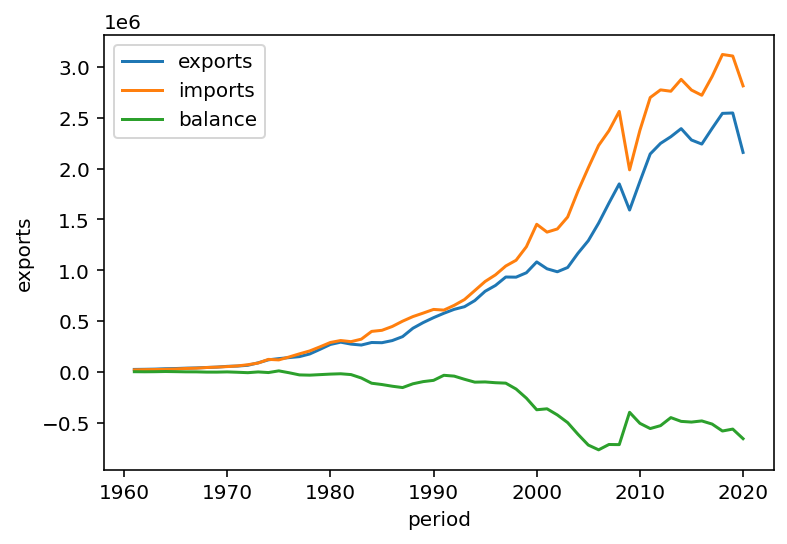

In [11]:
sns.lineplot(data=df,x='period',y='exports')
sns.lineplot(data=df,x='period',y='imports')
sns.lineplot(data=df,x='period',y='balance')
plt.legend(labels=["exports","imports",'balance'])

In [12]:
regress_mod_dem = smf.ols(formula='democrat ~ balance', data=df).fit()
regress_mod_dem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               democrat   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     10.02
Date:                Wed, 31 Aug 2022   Prob (F-statistic):            0.00247
Time:                        18:24:44   Log-Likelihood:                -184.91
No. Observations:                  60   AIC:                             373.8
Df Residuals:                      58   BIC:                             378.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.4528      0.928     48.991      0.000      43.596      47.310
balance    -8.818e-06   2.79e-06     -3.165      0.002   -1.44e-05   -3.24e-06
==============================================================================
Omnibus:                       24.527   Durbin-Watson:                   0.428
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.562
Skew:                           1.445   Prob(JB):                     2.57e-09
Kurtosis:                       5.735   Cond. No.                     4.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='balance', ylabel='democrat'>

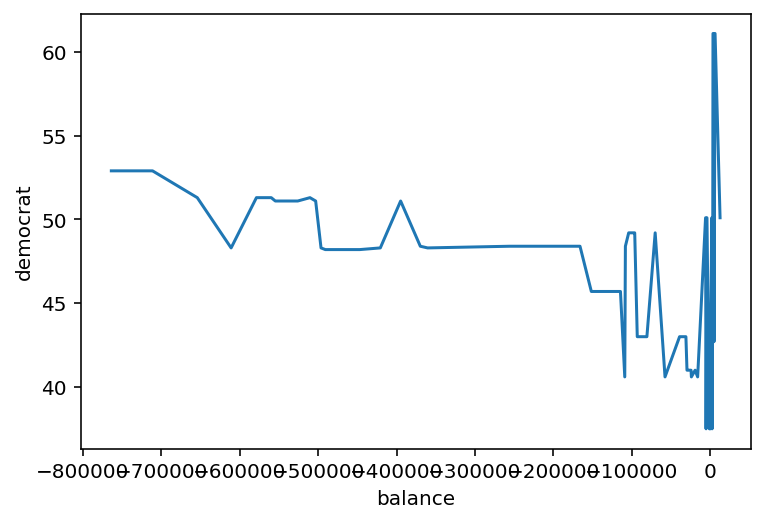

In [13]:
sns.lineplot(data=df,x='balance',y='democrat')

In [14]:
regress_mod_rep = smf.ols(formula='republican ~ balance', data=df).fit()
regress_mod_rep.summary()
#regress_mod_rep = smf.ols(data = df, formula = "republican ~ balance + other_predictors").fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             republican   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.2133
Date:                Wed, 31 Aug 2022   Prob (F-statistic):              0.646
Time:                        18:24:45   Log-Likelihood:                -196.04
No. Observations:                  60   AIC:                             396.1
Df Residuals:                      58   BIC:                             400.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.0965      1.117     43.061      0.000      45.861      50.332
balance     1.549e-06   3.35e-06      0.462      0.646   -5.17e-06    8.26e-06
==============================================================================
Omnibus:                        0.887   Durbin-Watson:                   0.387
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.977
Skew:                           0.247   Prob(JB):                        0.613
Kurtosis:                       2.617   Cond. No.                     4.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

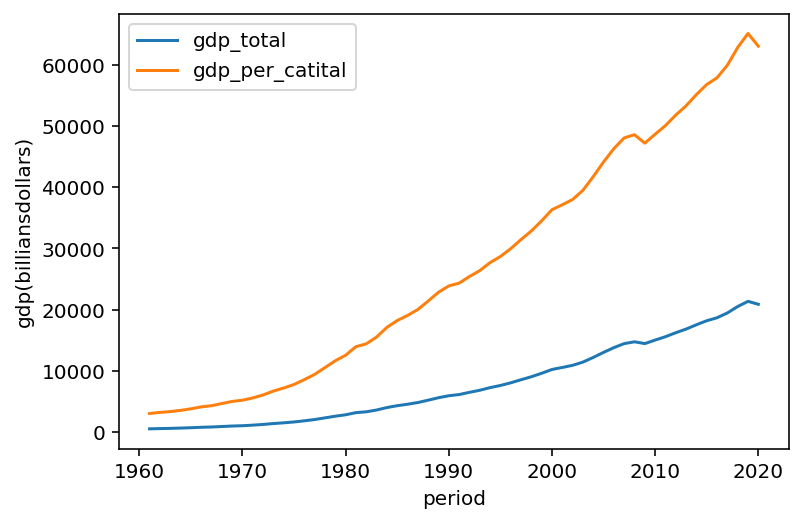

In [15]:
sns.lineplot(data=df,x='period',y='gdp(billiansdollars)')
sns.lineplot(data=df,x='period',y='gdppercapita')
plt.legend(labels=["gdp_total","gdp_per_catital"])

In [21]:
df= df.rename({'gdp(billiansdollars)': 'gdptotal'}, axis='columns')
df

,period,balance,exports,imports,democrat,republican,gdptotal,gdppercapita
1,1961.0,4194,26403,22208,61.1,38.5,563.300000,3066.5629
2,1962.0,3371,27722,24352,61.1,38.5,605.100000,3243.8431
3,1963.0,4210,29620,25411,61.1,38.5,638.600000,3374.5152
4,1964.0,6022,33340,27319,61.1,38.5,685.800000,3573.9412
5,1965.0,4664,35285,30621,42.7,43.4,743.700000,3827.5271
6,1966.0,2939,38926,35987,42.7,43.4,815.000000,4146.3166
7,1967.0,2604,41333,38729,42.7,43.4,861.700000,4336.4266
8,1968.0,250,45544,45292,42.7,43.4,942.500000,4695.9234
9,1969.0,90,49220,49130,37.5,60.7,1019.900000,5032.1447
10,1970.0,2255,56640,54385,37.5,60.7,1073.303000,5234.2967


In [30]:
regress_mod_dem1 = smf.ols(formula='democrat ~ gdptotal', data=df).fit()
regress_mod_dem1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               democrat   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     7.265
Date:                Wed, 31 Aug 2022   Prob (F-statistic):            0.00919
Time:                        18:41:49   Log-Likelihood:                -186.15
No. Observations:                  60   AIC:                             376.3
Df Residuals:                      58   BIC:                             380.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.0916      1.112     40.532      0.000      42.865      47.319
gdptotal       0.0003      0.000      2.695      0.009    7.64e-05       0.001
==============================================================================
Omnibus:                       22.824   Durbin-Watson:                   0.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.514
Skew:                           1.385   Prob(JB):                     3.20e-08
Kurtosis:                       5.477   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
regress_mod_rep1 = smf.ols(formula='republican ~ gdptotal', data=df).fit()
regress_mod_rep1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             republican   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.144
Date:                Wed, 31 Aug 2022   Prob (F-statistic):              0.289
Time:                        18:42:05   Log-Likelihood:                -195.57
No. Observations:                  60   AIC:                             395.1
Df Residuals:                      58   BIC:                             399.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.8283      1.302     37.516      0.000      46.223      51.434
gdptotal      -0.0001      0.000     -1.070      0.289      -0.000       0.000
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.585
Skew:                           0.091   Prob(JB):                        0.746
Kurtosis:                       2.552   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='gdptotal', ylabel='democrat'>

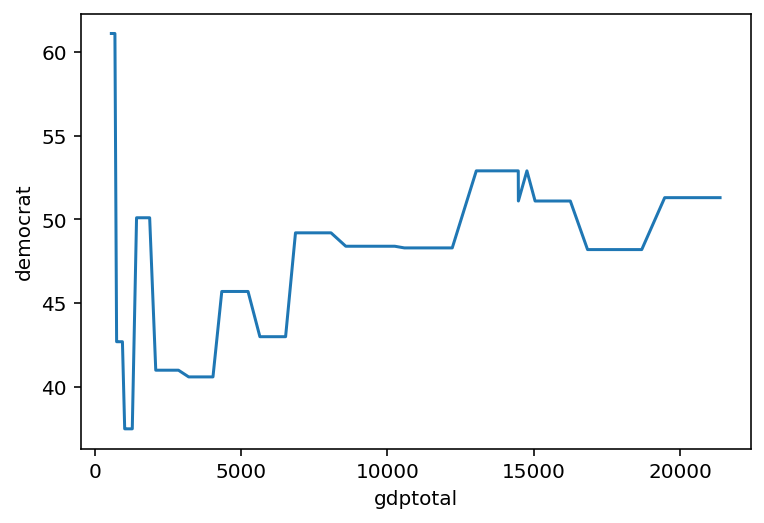

In [32]:
sns.lineplot(data=df,x='gdptotal',y='democrat')

In [33]:
regress_mod_dem2 = smf.ols(formula='democrat ~ balance+gdptotal', data=df).fit()
regress_mod_dem2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               democrat   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     4.969
Date:                Wed, 31 Aug 2022   Prob (F-statistic):             0.0103
Time:                        18:42:35   Log-Likelihood:                -184.87
No. Observations:                  60   AIC:                             375.7
Df Residuals:                      57   BIC:                             382.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6423      1.153     39.597      0.000      43.334      47.951
balance    -1.052e-05   6.67e-06     -1.577      0.120   -2.39e-05    2.84e-06
gdptotal   -7.268e-05      0.000     -0.281      0.779      -0.001       0.000
==============================================================================
Omnibus:                       23.279   Durbin-Watson:                   0.430
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.173
Skew:                           1.391   Prob(JB):                     1.40e-08
Kurtosis:                       5.594   Cond. No.                     5.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [2]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

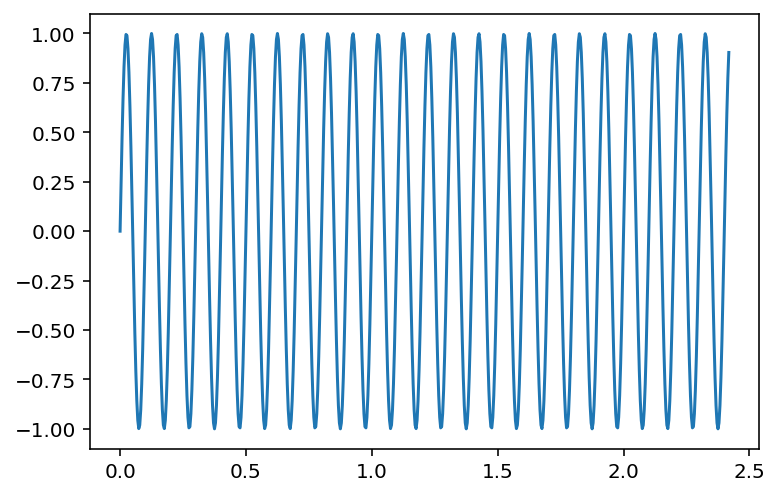

In [32]:
sr = 256

f = 10
tmax=2.42
dt = 1/sr

t=np.arange(0,tmax,dt)

sw = np.sin(2*pi*f*t)

plt.plot(t,sw)
plt.show()

In [33]:
#sw=np.fft.rfft(sw)
sp[100]

(-6.692383675377292e-15-1.489646806883176e-14j)

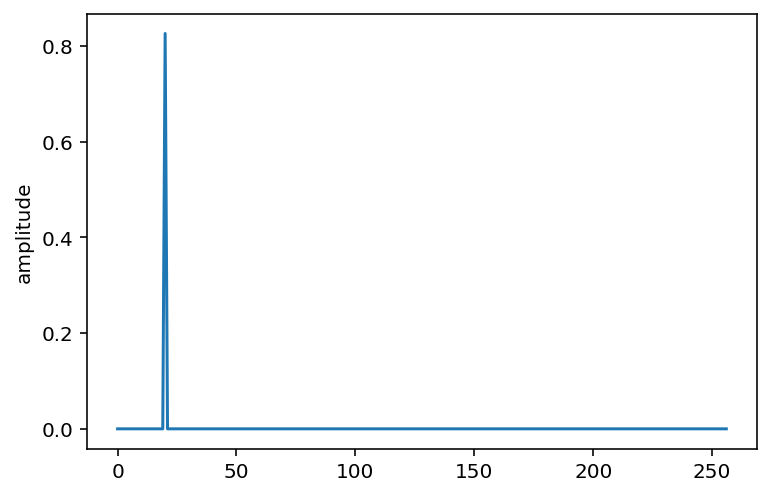

In [34]:
amp = np.abs( sp )
amp = (amp/len(sw)) * 2

#fr=1/tmax
fr=np.fft.rfftfreq (sw.size,dt)


plt.plot(amp)
plt.ylabel('amplitude')
plt.show()

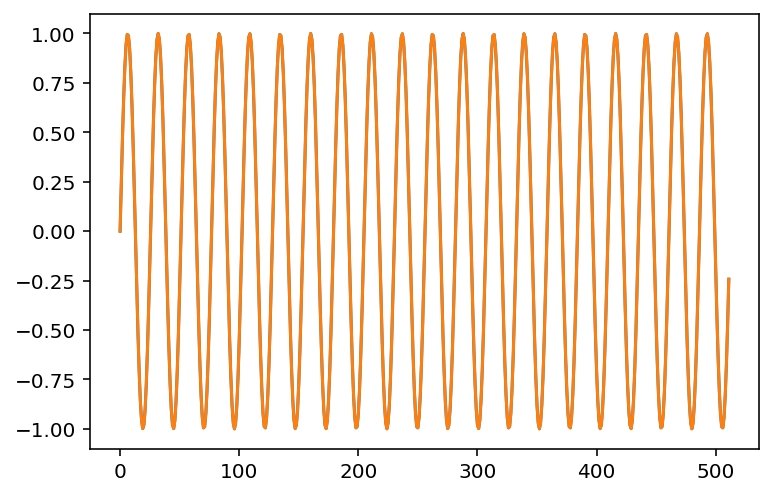

In [19]:
isp = np.fft.irfft(sp)
plt.plot(isp)
plt.plot(sw)
plt.show()

In [21]:
#fr = SR/N
#fr = SR/N =SR/(SR*T)=1/T
 

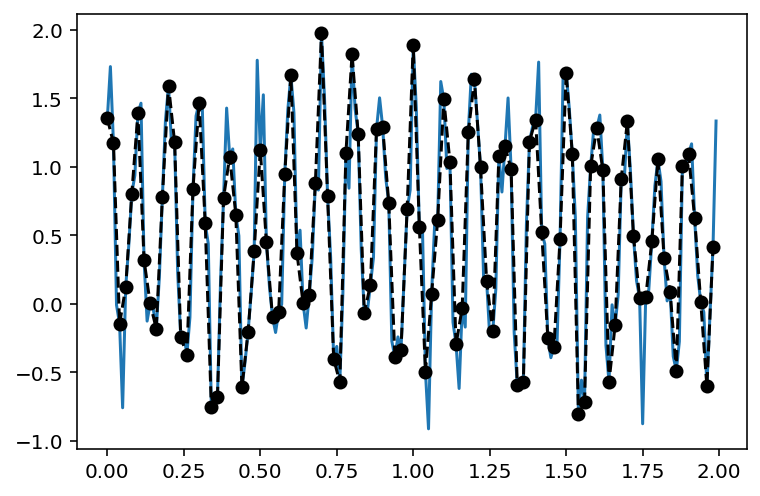

In [29]:
sr = 100
f = 10
tmax = 2
dt = 1/sr
t = np.arange(0, tmax, dt)

fr = 1/tmax



#make a signal
sw = np.cos( 2*pi*f*t)
sw += np.random.random(len(sw))



plt.plot(t,sw)

plt.show()

In [ ]:
data = eeg['data']
st = eeg ['sr']
tx = eeg['tx']

In [36]:
tx

NameError: name 'tx' is not defined